In [ ]:
!ls COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv

In [33]:
import requests as req
import time
DATE = time.strftime("%m-%d-%H_")
URL ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

resp = req.get(URL)
content = resp.text

#create a date oriented filename and print it
filename=str(DATE)+"_"+URL[-21:]
print(filename)
content=content.replace(",,",",Ex,")
content=content.replace("(","")
content=content.replace(")","")
content=content.replace("\"","")
print(content)
# Open a file using the new filename and write the content of the 'gitfile' to it.
# Update one time daily
TEMP = open(filename,"w")
TEMP.write(content)
TEMP.close()

05-02-17__covid19_deaths_US.csv
UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
16.0,AS,ASM,16,60.0,Ex,American Samoa,US,-14.271,-170.132,American Samoa, US,55641,0,0,0,0,0

79
drawing image from arcGIS server...
...finished


{'created_at': 'Wed Apr 29 22:40:28 +0000 2020',
 'id': 1255628042333872128,
 'id_str': '1255628042333872128',
 'text': '#Kansas  #arcGIS server #Basemap #COVID-19 - #Python  Plot data using https://t.co/BWK4DrQSM7 #JupyterJones https://t.co/GHEcOmDucY',
 'truncated': False,
 'entities': {'hashtags': [{'text': 'Kansas', 'indices': [0, 7]},
   {'text': 'arcGIS', 'indices': [9, 16]},
   {'text': 'Basemap', 'indices': [24, 32]},
   {'text': 'COVID', 'indices': [33, 39]},
   {'text': 'Python', 'indices': [45, 52]},
   {'text': 'JupyterJones', 'indices': [94, 107]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/BWK4DrQSM7',
    'expanded_url': 'https://github.com/JupyterJones/COVID-19-Jupyter-Notebooks',
    'display_url': 'github.com/JupyterJones/C…',
    'indices': [70, 93]}],
  'media': [{'id': 1255628039133622273,
    'id_str': '1255628039133622273',
    'indices': [108, 131],
    'media_url': 'http://pbs.twimg.com/media/EWzjDIqUcAE4_iW.png',
    'media_url_h

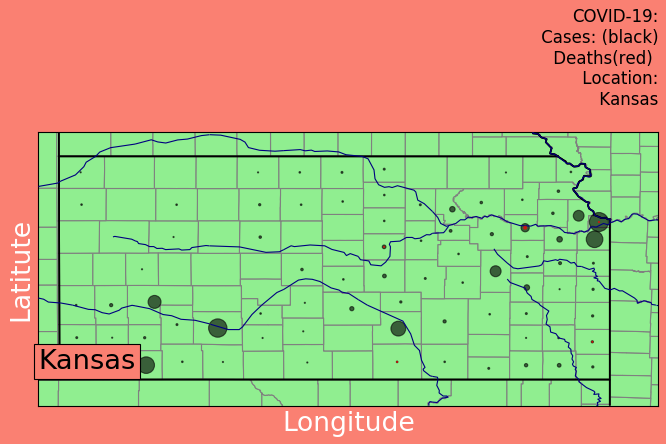

In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image,ImageFont,ImageDraw,ImageFilter,ImageChops
from random import randint
from mpl_toolkits.basemap import Basemap
#prevents a warning from using Python3 instaead of Python2
import warnings
from RandomState import *
warnings.filterwarnings("ignore")
import sys
sys.path.insert(1, "/home/jack/hidden")
import Key
import twython
from twython import Twython
# Make the figure
#fig = plt.figure()
#ax = fig.add_subplot(111)

# Easiest way to make a basemap is to use the cylidrical projection and 
# define the bottom left lat/lon and top right lat/lon corners

def RndState():
    TX=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
    x=randint(1,49)
    return TX[x]
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-28-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
cases=[]
deaths =[]
longitude = ""
search = RndState()
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if search in line[2] and "-" in (line[6]):
        text=line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10]
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        if int(line[8])>0:
            LATd.append(line[5])
            LONGd.append(line[6])        
        cases.append(line[7])
        deaths.append(line[8])
        longitude = longitude+line[6]+","
print(len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
LTd = np.array(LATd,dtype=np.float)
LGd = np.array(LONGd,dtype=np.float)


fig = plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='salmon')


urcrnrlat=max(LT)+.5
llcrnrlat=min(LT)-.5
urcrnrlon=max(LG)+.8
llcrnrlon=min(LG)-.5
lat_0 = (urcrnrlat+llcrnrlat)/2
lon_0 =(urcrnrlon+llcrnrlon)/2

# create the map object, m
m = Basemap(resolution='i', projection='cyl', \
    llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat, urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat)

# Note: You can define the resolution of the map you just created. Higher 
# resolutions take longer to create.
#    'c' - crude
#    'l' - low
#    'i' - intermediate
#    'h' - high
#    'f' - full

# Draw some map elements on the map
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#ddaa66',lake_color='aqua')
m.drawcoastlines()
m.drawrivers(linewidth=1.0,color='navy',zorder=8)
m.drawcounties(linewidth=1.0, linestyle='solid', color='gray', antialiased=1, facecolor='lightgreen', ax=None, zorder=2, drawbounds=True)
m.drawstates(linewidth=1.5, linestyle='solid', color='black', antialiased=1,zorder=2, )
plt.text(llcrnrlon,llcrnrlat+.5, search, color='black', fontsize=24.5, zorder=6,bbox=dict(facecolor='salmon'))

# Drawing ArcGIS Basemap (only works with cylc projections??)
# Examples of what each map looks like can be found here:
# http://kbkb-wx-python.blogspot.com/2016/04/python-basemap-background-image-from.html
maps = ['ESRI_Imagery_World_2D',    # 0
        'ESRI_StreetMap_World_2D',  # 1
        'NatGeo_World_Map',         # 2
        'NGS_Topo_US_2D',           # 3
        'Ocean_Basemap',            # 4
        'USA_Topo_Maps',            # 5
        'World_Imagery',            # 6
        'World_Physical_Map',       # 7
        'World_Shaded_Relief',      # 8
        'World_Street_Map',         # 9
        'World_Terrain_Base',       # 10
        'World_Topo_Map'            # 11
        ]
print ("drawing image from arcGIS server..."),
m.arcgisimage(service=maps[8], xpixels=1000, verbose=False)
print ("...finished")

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.5)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

Sd=0
Sized=[]
for xd in deaths:
    Sd=0+(float(xd))
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)
#print(Sized)
plt.title("COVID-19:\n Cases: (black)\n Deaths(red) \n Location:\n "+search+"\n", fontsize=15, loc='right')
#plt.text(max(LG-1.2),max(LT), search, color='white', fontsize=24)
#x, y = m(lons, lats)  # transform coordinates
x, y = m(LGd, LTd)
xx,yy = m(LG, LT)
plt.xlabel('Longitude',color="white", fontsize=24)
plt.ylabel('Latitute',color="white", fontsize=24)

m.scatter(xx, yy, s=s, color='black', zorder=5, alpha=0.6)
m.scatter(x, y, s=sd, color='r', zorder=10,  alpha=0.6)

#plt.text(urcrnrlon,urcrnrlat, search, color='white', fontsize=24)
plt.savefig("BaseMap/"+search+"arcGIS__.png", dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)

filename0 = "BaseMap/"+search+"arcGIS__.png"


def draw_blurred_back(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

if __name__ == '__main__':
    
    basewidth = 720
    inp = Image.open(filename0)
    wpercent = (basewidth / float(inp.size[0]))
    hsize = int((float(inp.size[1]) * float(wpercent)))
    inp = inp.resize((basewidth, hsize), Image.ANTIALIAS)
    #img.save(resized_image.jpg')
    
    #inp = inp.resize((640,640), Image.ANTIALIAS)
    font = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 30)
    text_title = (255, 255,230) # bright green
    blur_title = (0, 0, 0)   # black

    i2 = draw_blurred_back(inp, (15, 30), "Plotting COVID-19 Data", font, text_title, blur_title)
    font0 = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 20)
    font1 = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 14)
    font2 = ImageFont.truetype("/home/jack/fonts/PatrickHand-Regular.ttf", 16)
    i2 = draw_blurred_back(i2, (15, 65), "Plot Using ArcGIS Basemap - "+search, font0, text_title, blur_title)
    TXT="https://github.com/JupyterJones/COVID-19-Jupyter-Notebooks"
    draw = ImageDraw.Draw(i2) 
    draw.text((15, 5), TXT, font = font2, align ="left",fill="black")
    #i2 = draw(i2, (15, 65),TXT, font1)    
    
    #txt = Image.new('RGBA', i.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 20)
    # get a drawing context
    signature_ = "@jacklnorthrup" 
    #get length in pixel of signature_
    sizeS,ln = fnt.getsize(signature_)
    #add 15 pixels to right border
    pt = sizeS+25
    width, height = inp.size
    #marginx starting point of signature_
    marginx = pt
    #bottom margin
    marginy = 30
    x = width - marginx
    y = height - marginy
    

    text_sig = (255, 255,230) # bright green
    blur_sig = (0, 0, 0)   # black
    txt=draw_blurred_back(i2,(x,y), signature_, fnt, text_sig, blur_sig)
    out = Image.alpha_composite(i2, txt)
    out.save("images/TEMP_POST.png")

CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)

STR = "#"+search+"  #arcGIS server #Basemap #COVID-19 - #Python  Plot data using "+TXT+" #JupyterJones" 

PATH = "images/TEMP_POST.png"
photo = open(PATH,'rb')
response = twitter.upload_media(media=photo)
twitter.update_status(status=STR, media_ids=[response['media_id']])

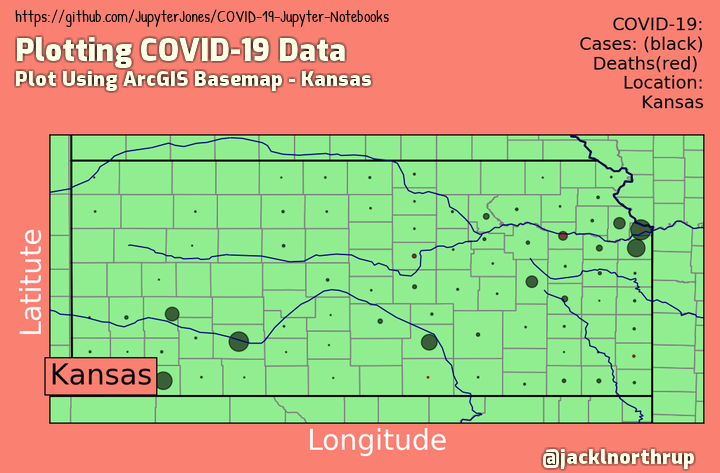

In [2]:
from PIL import Image
IM = Image.open(PATH)
IM

73


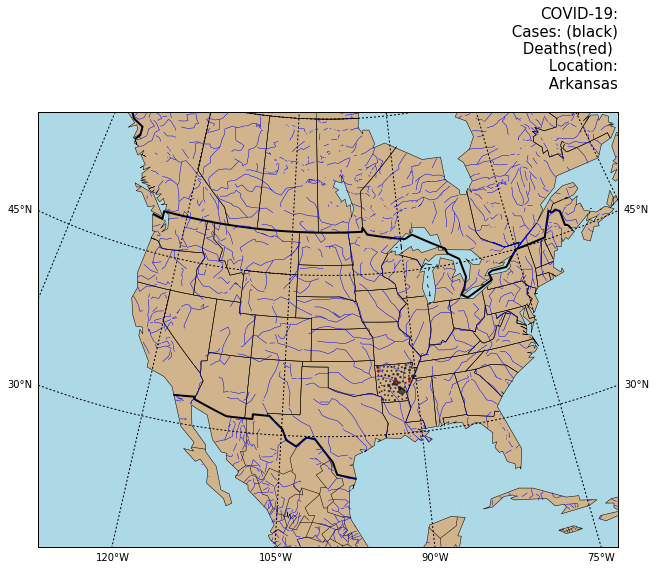

In [4]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image,ImageFont,ImageDraw,ImageFilter,ImageChops
from random import randint
from mpl_toolkits.basemap import Basemap
fig = plt.figure(num=None, figsize=(12, 8) ) 
m = Basemap(width=6000000,height=4500000,resolution='c',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,15.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,15.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawrivers(linewidth=0.5, linestyle='solid', color='blue')
def RndState():
    TX=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
    x=randint(1,49)
    return TX[x]

search = RndState()
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-27-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
cases=[]
deaths =[]
longitude = ""
search = RndState()
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if search in line[2] and "-" in (line[6]):
        text=line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10]
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        if int(line[8])>0:
            LATd.append(line[5])
            LONGd.append(line[6])        
        cases.append(line[7])
        deaths.append(line[8])
        longitude = longitude+line[6]+","
print(len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
LTd = np.array(LATd,dtype=np.float)
LGd = np.array(LONGd,dtype=np.float)

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.05)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

Sd=0
Sized=[]
for xd in deaths:
    Sd=0+(float(xd)+.05)
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)
#print(Sized)
plt.title("COVID-19:\n Cases: (black)\n Deaths(red) \n Location:\n "+search+"\n", fontsize=15, loc='right')
#plt.text(max(LG-1.2),max(LT), search, color='white', fontsize=24)
#x, y = m(lons, lats)  # transform coordinates
x, y = m(LGd, LTd)
xx,yy = m(LG, LT)
plt.xlabel('Longitude',color="white", fontsize=24)
plt.ylabel('Latitute',color="white", fontsize=24)

m.scatter(xx, yy, s=s, color='black', zorder=5, alpha=0.6)
m.scatter(x, y, s=sd, color='r', zorder=10,  alpha=0.6)

plt.savefig("BaseMap/"+search+"Hotspots1__.png", dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)


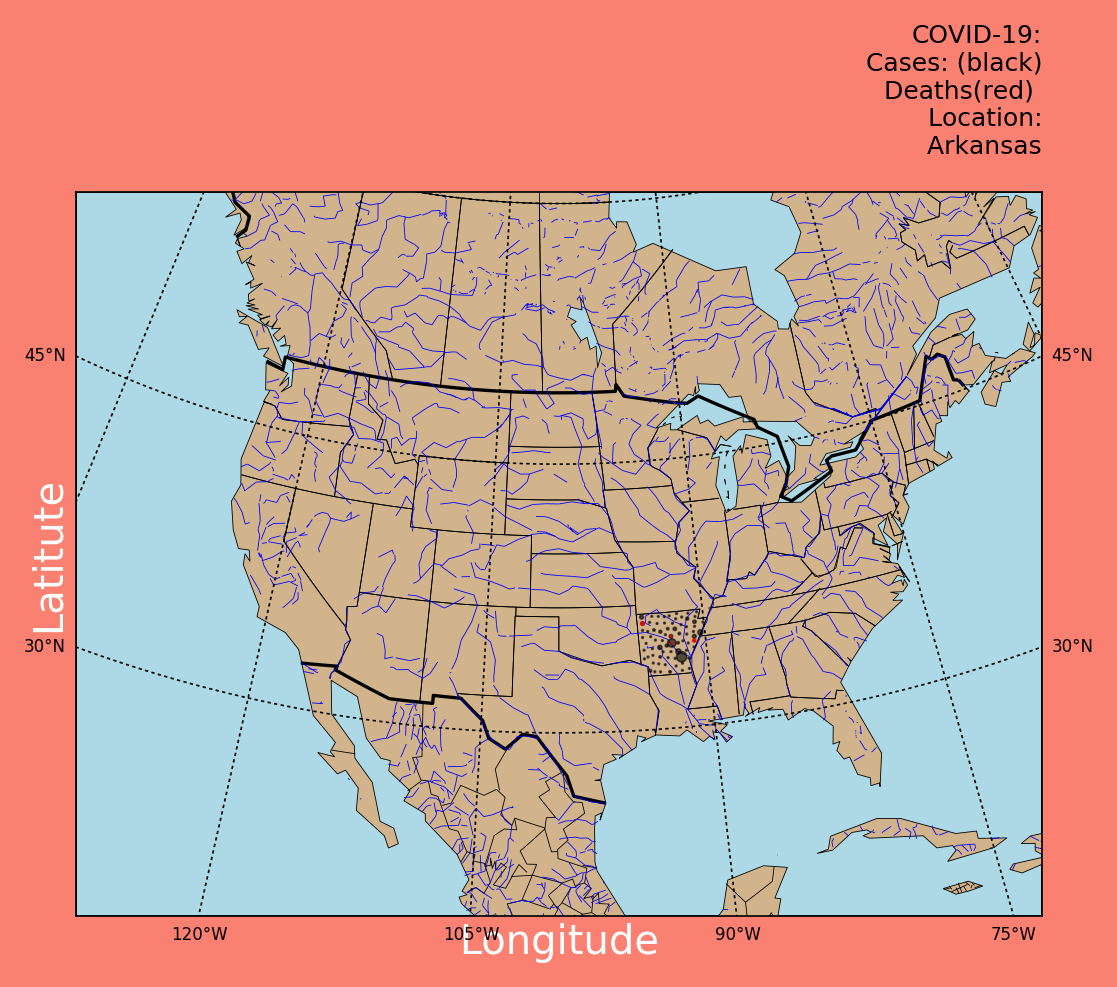

In [5]:
from PIL import Image
IM = Image.open("BaseMap/"+search+"Hotspots1__.png")
IM

In [ ]:
import requests as req

#URL ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
URL ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"


print (URL[-25:])
STAT =URL[57:-4]
resp = req.get(URL)

#LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
#STAT =LASTFILE[57:-4]
#DataIn = open(LASTFILE).readlines()

content = resp.text

TEMP = open(URL[-25:],"w")
TEMP.write(content)
TEMP.close()


In [2]:
LASTFILE0="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/time_series_covid19_confirmed_US.csv"
LASTFILE="ies_covid19_deaths_US.csv"
DataIn = open(LASTFILE).readlines()
cnt=0
for line in DataIn:
    if cnt<10:print (line)
    cnt=cnt+1
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    #if cnt<10 and line[5] !="":print (line[6])
    if "US" == line[7]:
        #if CNT<5 and line[5] !="":print line
        CNT=CNT+1
        ALL.append(line)
        text=line[5],line[6],line[8],line[9]
        if CNT<20:print(text)
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        if int(line[-1])>0:
            if line[-2]<line[-1]:
                #prints all lines with increases
                #print (text,line[-2],line[-1] )
                yesterday=yesterday+int(line[-2])
                today= today+int(line[-1])
                Dcnt=Dcnt+1
                LATd.append(text)
                LONGd.append(text)
print(len(STATES))

UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20

16.0,AS,ASM,16,60.0,,American Samoa,US,-14.270999999999999,-170.132,"American Samoa, US",55641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
#LASTFILE0="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/time_series_covid19_confirmed_US.csv"
#LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
ALL=[]
cases=[]
deaths =[]
yesterday=0
today=0
longitude = ""
cnt=0
CNT=0
Dcnt=0
for line in DataIn:
    line=line.replace('"','')
    if cnt==0:print (line)
    cnt=cnt+1
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    #if cnt<10 and line[5] !="":print (line[6])
    if "US" == line[7]:
        #if CNT<5 and line[5] !="":print line
        CNT=CNT+1
        ALL.append(line)
        text=line[5],line[6],line[8],line[9]
        if CNT<20:print(text)
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        if int(line[-1])>0:
            if line[-2]<line[-1]:
                #prints all lines with increases
                #print (text,line[-2],line[-1] )
                yesterday=yesterday+int(line[-2])
                today= today+int(line[-1])
                Dcnt=Dcnt+1
                LATd.append(text)
                LONGd.append(text)
print(len(STATES))

In [ ]:
cnt=0
data=open("STATE.data","w")
data.write("City,State,Latitude,Longitude\n")
for line in STATES:
    cnt=cnt+1
    line =str(line)
    line=line.replace("(","")
    line=line.replace(")","")
    line=line.replace(")","")
    line=line.replace(")","")
    data.write(line+"\n")
data.close    

In [6]:
#LASTFILE0="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/time_series_covid19_confirmed_US.csv"
#LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
ALL=[]
cases=[]
deaths =[]
yesterday=0
today=0
longitude = ""
cnt=0
CNT=0
Dcnt=0
for line in DataIn:
    line=line.replace('"','')
    #if cnt==0:print (line)
    cnt=cnt+1
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    #if cnt<10 and line[5] !="":print (line[6])
    if "US" == line[7]:# and line[6] == "New York":
        #if CNT<5 and line[5] !="":print line
        CNT=CNT+1
        ALL.append(line)
        text=line[5],line[6],line[8],line[9]
        #print(text)
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        L=len(line)
        #print(L)
        #print(line[L-1],line[L-2])
        if int(line[L-2])+10<int(line[L-1]):
            print ("if ",int(line[L-2]),'+10',int(line[L-1]))
            print (text,int(line[L-2]),int(line[L-1]))
            yesterday=yesterday+int(line[-2])
            today= today+int(line[-1])
            Dcnt=Dcnt+1
            LATd.append(text)
            LONGd.append(text)
print ('------------')
print ('Counties',CNT) 
print ('Counties with new deaths',Dcnt)
print (len(LONGd))
print (Dcnt)
print ("yesterday",yesterday)
print ("today",today)
print ("today-yesterday",today-yesterday)

------------
Counties 0
Counties with new deaths 0
0
0
yesterday 0
today 0
today-yesterday 0


['84001005.0', 'US', 'USA', '840', '1005.0', 'Barbour', 'Alabama', 'US', '31.868263', '-85.3871286', 'Barbour', ' Alabama', ' US', '24686', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['84001007.0', 'US', 'USA', '840', '1007.0', 'Bibb', 'Alabama', 'US', '32.99642064', '-87.12511459999996', 'Bibb', ' Alabama', ' US', '22394', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

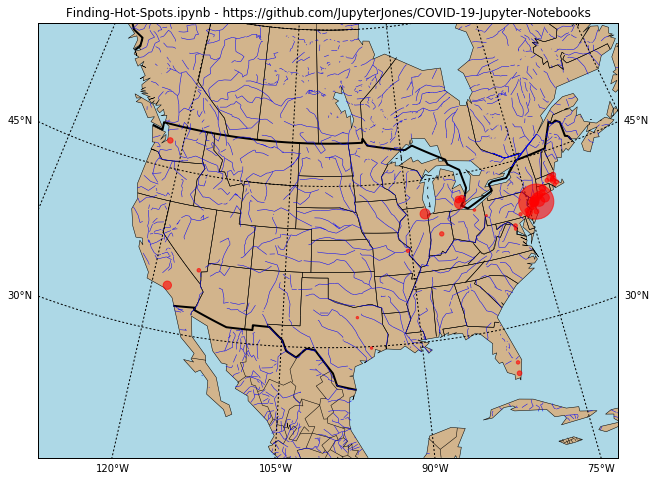

In [20]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image,ImageFont,ImageDraw,ImageFilter,ImageChops
from random import randint
from mpl_toolkits.basemap import Basemap
fig = plt.figure(num=None, figsize=(12, 8) ) 
m = Basemap(width=6000000,height=4500000,resolution='c',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,15.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,15.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawrivers(linewidth=0.5, linestyle='solid', color='blue')


cities =[]
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
ALL=[]
cases=[]
deaths =[]
yesterday=0
today=0
longitude = ""
cnt=0
CNT=0
Dcnt=0
LASTFILE="ies_covid19_deaths_US.csv"
DataIn = open(LASTFILE).readlines()
for line in DataIn:
    line=line.replace('"','')
    #if cnt==0:print (line)
    cnt=cnt+1
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    #if cnt<10 and line[5] !="":print (line[6])
    if "US" == line[7]:# and line[6] == "New York":
        if CNT==7:print(line)
        if CNT==8:print(line)    
        #if CNT<5 and line[5] !="":print line
        CNT=CNT+1
        ALL.append(line)
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        L=len(line)
        #print(L)
        #print(line[L-1],line[L-2])
        if int(line[L-2])+10<int(line[L-1]):
            #print ("if ",int(line[L-2]),'+10',int(line[L-1]))
            #print (text,int(line[L-2]),int(line[L-1]))
            yesterday=yesterday+int(line[-2])
            today= today+int(line[-1])
            Dcnt=Dcnt+1
            if len(line[8])>3:
                #print(line[8],line[9])
                cities.append([line[5],line[6],line[8],line[9],int(line[L-1])])
                LATd.append(line[8])
                LONGd.append(line[9])
                deaths.append(int(line[L-1]))
LTd = np.array(LATd,dtype=np.float)
LGd = np.array(LONGd,dtype=np.float)
Str = np.array(cities,dtype=np.str)

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.01)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

Sd=1
Sized=[]
for xd in deaths:
    Sd=0+(float(xd)*.07)
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)
#print(Sized)
plt.title("Finding-Hot-Spots.ipynb - https://github.com/JupyterJones/COVID-19-Jupyter-Notebooks")
#plt.text(max(LG-1.2),max(LT), search, color='white', fontsize=24)
#x, y = m(lons, lats)  # transform coordinates
x, y = m(LGd, LTd)
#xx,yy = m(LG, LT)
plt.xlabel('Longitude',color="white", fontsize=24)
plt.ylabel('Latitute',color="white", fontsize=24)

#m.scatter(xx, yy, s=s, color='black', zorder=5, alpha=0.6)
m.scatter(x, y, s=sd, color='r', zorder=10,  alpha=0.6)
filename = "BaseMap/april30_Hotspots__.png"
plt.savefig(filename, dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)


In [26]:
for i in (range(0,len(cities))):
    print(cities[i][0])
    print(cities[i][1])
    print(cities[i][2])
    print(cities[i][3])
    print("-----------")

Los Angeles
California
34.30828379
-118.22824109999999
-----------
Fairfield
Connecticut
41.26809896
-73.3881171
-----------
Hartford
Connecticut
41.80283011
-72.73103891
-----------
New Haven
Connecticut
41.408032500000004
-72.93620426
-----------
Miami-Dade
Florida
25.6112362
-80.55170587
-----------
Palm Beach
Florida
26.64676272
-80.46536002
-----------
Cook
Illinois
41.84144849
-87.81658794
-----------
Marion
Indiana
39.78163624
-86.13826325
-----------
Montgomery
Maryland
39.13676329
-77.20358245
-----------
Bristol
Massachusetts
41.79228404
-71.10872211
-----------
Essex
Massachusetts
42.6687626
-70.94687179
-----------
Middlesex
Massachusetts
42.48607732
-71.39049229
-----------
Norfolk
Massachusetts
42.16073095
-71.20530408
-----------
Plymouth
Massachusetts
41.94070556
-70.80802823
-----------
Suffolk
Massachusetts
42.327951399999996
-71.07850442
-----------
Worcester
Massachusetts
42.35026951
-71.90493363
-----------
Macomb
Michigan
42.69158356
-82.92752801
-----------
Oakla

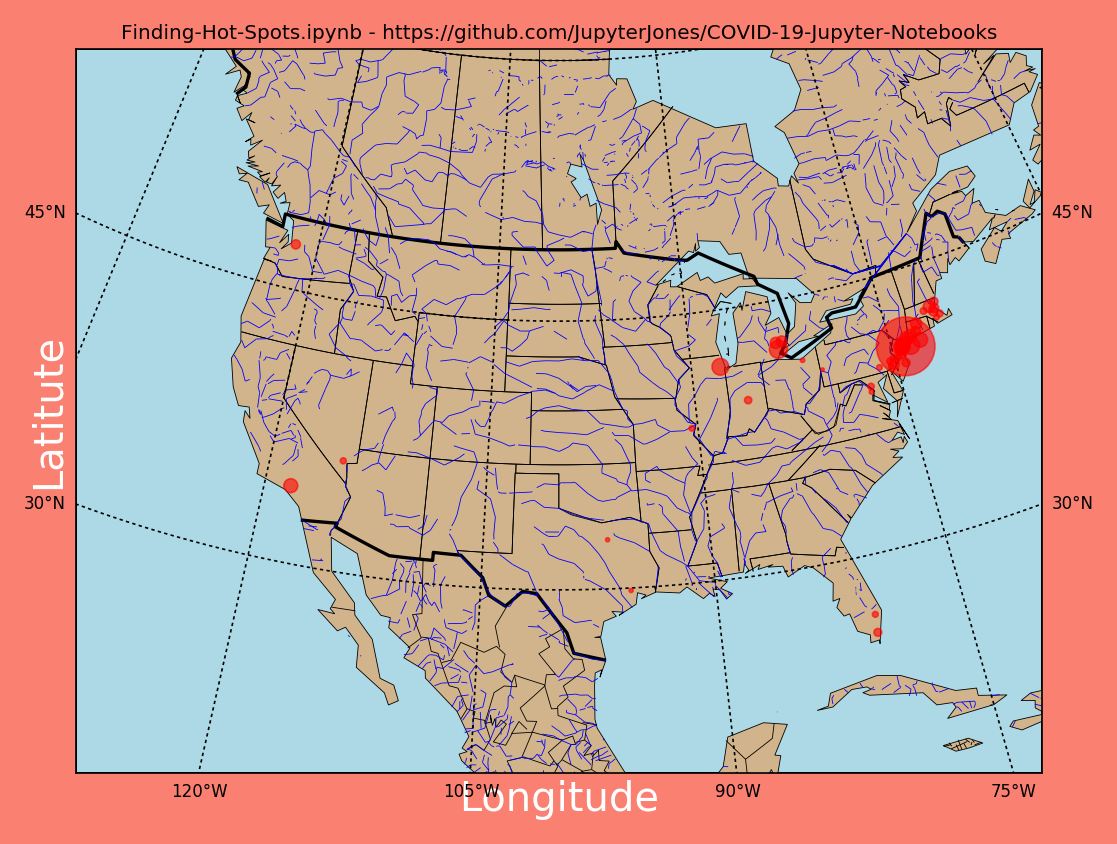

In [11]:
from PIL import Image
IM = Image.open("BaseMap/april30_Hotspots__.png")
IM

In [12]:
print(cities)

[]


In [10]:
LASTFILE="ies_covid19_deaths_US.csv"
DataIn = open(LASTFILE).readlines()
for line in DataIn:
    line=line.replace('"','')
    if cnt==0:print (line)
    cnt=cnt+1
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    #if cnt<10 and line[5] !="":print (line[6])
    if "US" == line[7]:# and line[6] == "New York":
        #if CNT<5 and line[5] !="":print line
        CNT=CNT+1
        ALL.append(line)
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        L=len(line)
        #print(L)
        #print(line[L-1],line[L-2])
        if int(line[L-2])+10<int(line[L-1]):
            #print ("if ",int(line[L-2]),'+10',int(line[L-1]))
            #print (text,int(line[L-2]),int(line[L-1]))
            yesterday=yesterday+int(line[-2])
            today= today+int(line[-1])
            Dcnt=Dcnt+1
            if len(line[8])>3:
                print(line[8],line[9],line[8],line[9])
                LATd.append(line[8])
                LONGd.append(line[9])
            

34.30828379 -118.22824109999999
41.26809896 -73.3881171
41.80283011 -72.73103891
41.408032500000004 -72.93620426
25.6112362 -80.55170587
26.64676272 -80.46536002
41.84144849 -87.81658794
39.78163624 -86.13826325
39.13676329 -77.20358245
41.79228404 -71.10872211
42.6687626 -70.94687179
42.48607732 -71.39049229
42.16073095 -71.20530408
41.94070556 -70.80802823
42.327951399999996 -71.07850442
42.35026951 -71.90493363
42.69158356 -82.92752801
42.66090111 -83.38595416
42.28098405 -83.281255
38.63770039999999 -90.4458375
36.21458855 -115.0130241
40.96010917 -74.07164325
40.78681335 -74.24657979
40.73766234 -74.07515667
40.28047017 -74.70479631
40.43629879 -74.41426991
40.86095313 -74.54553709999998
39.8895449 -74.28089251
41.03238628 -74.29954144
40.56465737 -74.61683016
40.65835409 -74.30680092
40.74066522 -73.58941873
40.76727260000001 -73.97152637
40.88320119 -72.8012172
41.16278376 -73.75741653
41.424119 -81.65918339
40.6825484 -80.34921611
40.33682119 -75.10836643
39.91680171 -75.402436

24
drawing image from arcGIS server...
...finished


{'created_at': 'Wed Apr 29 08:17:20 +0000 2020',
 'id': 1255410826938331136,
 'id_str': '1255410826938331136',
 'text': 'Finding-Hot-Spots.ipynb https://t.co/BWK4DrzhUz https://t.co/sbInJHV16d',
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/BWK4DrzhUz',
    'expanded_url': 'https://github.com/JupyterJones/COVID-19-Jupyter-Notebooks',
    'display_url': 'github.com/JupyterJones/C…',
    'indices': [24, 47]}],
  'media': [{'id': 1255410823419375616,
    'id_str': '1255410823419375616',
    'indices': [48, 71],
    'media_url': 'http://pbs.twimg.com/media/EWwdfhEXsAAOmmB.png',
    'media_url_https': 'https://pbs.twimg.com/media/EWwdfhEXsAAOmmB.png',
    'url': 'https://t.co/sbInJHV16d',
    'display_url': 'pic.twitter.com/sbInJHV16d',
    'expanded_url': 'https://twitter.com/JackLNorthrup/status/1255410826938331136/photo/1',
    'type': 'photo',
    'sizes': {'small': {'w': 680, 'h': 514, 'resize': 'fit'},
     

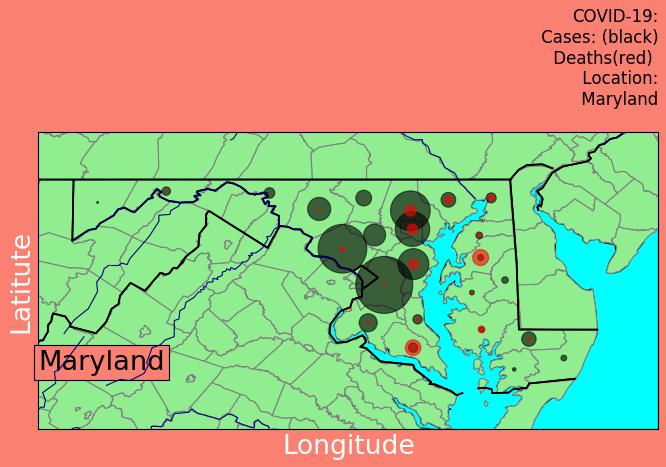

In [57]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image,ImageFont,ImageDraw,ImageFilter,ImageChops
from random import randint
from mpl_toolkits.basemap import Basemap
#prevents a warning from using Python3 instaead of Python2
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.insert(1, "/home/jack/hidden")
import Key
import twython
from twython import Twython
# Make the figure
#fig = plt.figure()
#ax = fig.add_subplot(111)

# Easiest way to make a basemap is to use the cylidrical projection and 
# define the bottom left lat/lon and top right lat/lon corners

def RndState():
    TX=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
    x=randint(1,50)
    return TX[x]
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-27-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
cases=[]
deaths =[]
longitude = ""
search = RndState()
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if search in line[2] and "-" in (line[6]):
        text=line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10]
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        if int(line[8])>0:
            LATd.append(line[5])
            LONGd.append(line[6])        
        cases.append(line[7])
        deaths.append(line[8])
        longitude = longitude+line[6]+","
print(len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
LTd = np.array(LATd,dtype=np.float)
LGd = np.array(LONGd,dtype=np.float)


fig = plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='salmon')


urcrnrlat=max(LT)+.5
llcrnrlat=min(LT)-.5
urcrnrlon=max(LG)+.8
llcrnrlon=min(LG)-.5
lat_0 = (urcrnrlat+llcrnrlat)/2
lon_0 =(urcrnrlon+llcrnrlon)/2

# create the map object, m
m = Basemap(resolution='i', projection='cyl', \
    llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat, urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat)

# Note: You can define the resolution of the map you just created. Higher 
# resolutions take longer to create.
#    'c' - crude
#    'l' - low
#    'i' - intermediate
#    'h' - high
#    'f' - full

# Draw some map elements on the map
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#ddaa66',lake_color='aqua')
m.drawcoastlines()
m.drawrivers(linewidth=1.0,color='navy',zorder=8)
m.drawcounties(linewidth=1.0, linestyle='solid', color='gray', antialiased=1, facecolor='lightgreen', ax=None, zorder=2, drawbounds=True)
m.drawstates(linewidth=1.5, linestyle='solid', color='black', antialiased=1,zorder=2, )
plt.text(llcrnrlon,llcrnrlat+.5, search, color='black', fontsize=24.5, zorder=6,bbox=dict(facecolor='salmon'))

# Drawing ArcGIS Basemap (only works with cylc projections??)
# Examples of what each map looks like can be found here:
# http://kbkb-wx-python.blogspot.com/2016/04/python-basemap-background-image-from.html
maps = ['ESRI_Imagery_World_2D',    # 0
        'ESRI_StreetMap_World_2D',  # 1
        'NatGeo_World_Map',         # 2
        'NGS_Topo_US_2D',           # 3
        'Ocean_Basemap',            # 4
        'USA_Topo_Maps',            # 5
        'World_Imagery',            # 6
        'World_Physical_Map',       # 7
        'World_Shaded_Relief',      # 8
        'World_Street_Map',         # 9
        'World_Terrain_Base',       # 10
        'World_Topo_Map'            # 11
        ]
print ("drawing image from arcGIS server..."),
m.arcgisimage(service=maps[8], xpixels=1000, verbose=False)
print ("...finished")

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.5)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

Sd=0
Sized=[]
for xd in deaths:
    Sd=0+(float(xd))
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)
#print(Sized)
plt.title("COVID-19:\n Cases: (black)\n Deaths(red) \n Location:\n "+search+"\n", fontsize=15, loc='right')
#plt.text(max(LG-1.2),max(LT), search, color='white', fontsize=24)
#x, y = m(lons, lats)  # transform coordinates
x, y = m(LGd, LTd)
xx,yy = m(LG, LT)
plt.xlabel('Longitude',color="white", fontsize=24)
plt.ylabel('Latitute',color="white", fontsize=24)

m.scatter(xx, yy, s=s, color='black', zorder=5, alpha=0.6)
m.scatter(x, y, s=sd, color='r', zorder=10,  alpha=0.6)



#plt.scatter(x, y,  s=s, color="black", zorder=3, alpha=0.6)
#plt.scatter(x, y,  s=sd, color="red", zorder=6, alpha=0.6)
#plt.text(urcrnrlon,urcrnrlat, search, color='white', fontsize=24)
plt.savefig("BaseMap/"+search+"arcGIS__.png", dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)
#plt.show()
# Plot a scatter point at WBB on the map object
#lon = -111.85
#lat = 40.77
#m.scatter(lon,lat,c='r',s=150)

# Plot some wind barbs
#lons = np.arange(-115,-100,.5)
#lats = np.arange(33,48,.5)
#u = np.arange(-5,10,.5)
#v = np.arange(5,20,.5)
#m.barbs(lons, lats, u, v, color='fuchsia')

# Plot line between two points
# (can also use greatcircle function to be more accurate)
#x = [-110, -112]
#y = [40, 42]
#m.plot(x, y, color='navy', lw=5)

# Fill two polygon shapes
#patches = []
#homeplate = np.array([[-114,38],[-113,37],[-112,38],[-112,40],[-114,40]])
#patches.append(Polygon(homeplate))
#triangle = np.array([[-111,38],[-110,37],[-110,42]])
#patches.append(Polygon(triangle))
#ax.add_collection(PatchCollection(patches, facecolor='lightgreen', edgecolor='k', linewidths=1.5))

# Plot shapefiles: see here: http://basemaptutorial.readthedocs.io/en/latest/shapefile.html

# Plot contours
#m.contour(lons2D, lats2D, values2D)  # contour lines
# m.contourf(lons2D, lats2D, values2D) # contour color filled, can specify a cmap

# Plot gridded data
# m.pcolormesh(lons2D, lats2D, values2D) # can specify a cmap

# Add plot title and other plot elements the normal way
filename0 = "BaseMap/april29_Hotspots__.png"


def draw_blurred_back(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

if __name__ == '__main__':
    
    basewidth = 720
    inp = Image.open(filename0)
    wpercent = (basewidth / float(inp.size[0]))
    hsize = int((float(inp.size[1]) * float(wpercent)))
    inp = inp.resize((basewidth, hsize), Image.ANTIALIAS)
    #img.save(resized_image.jpg')
    
    #inp = inp.resize((640,640), Image.ANTIALIAS)
    font = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 30)
    text_title = (255, 255,230) # bright green
    blur_title = (0, 0, 0)   # black

    i2 = draw_blurred_back(inp, (65, 60), "Plotting COVID-19 Data", font, text_title, blur_title)
    font0 = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 20)
    font1 = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 14)
    font2 = ImageFont.truetype("/home/jack/fonts/PatrickHand-Regular.ttf", 16)
    i2 = draw_blurred_back(i2, (65, 95), "Finding-Hot-Spots.ipynb", font0, text_title, blur_title)
    TXT="https://github.com/JupyterJones/COVID-19-Jupyter-Notebooks"
    draw = ImageDraw.Draw(i2) 
    draw.text((65, 45), TXT, font = font2, align ="left",fill="black")
    #i2 = draw(i2, (15, 65),TXT, font1)    
    
    #txt = Image.new('RGBA', i.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 20)
    # get a drawing context
    signature_ = "@jacklnorthrup" 
    #get length in pixel of signature_
    sizeS,ln = fnt.getsize(signature_)
    #add 15 pixels to right border
    pt = sizeS+25
    width, height = inp.size
    #marginx starting point of signature_
    marginx = pt
    #bottom margin
    marginy = 30
    x = width - marginx
    y = height - marginy
    

    text_sig = (255, 255,230) # bright green
    blur_sig = (0, 0, 0)   # black
    txt=draw_blurred_back(i2,(x,y), signature_, fnt, text_sig, blur_sig)
    out = Image.alpha_composite(i2, txt)
    out.save("images/TEMP_POST.png")

CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)

STR = "Finding-Hot-Spots.ipynb https://github.com/JupyterJones/COVID-19-Jupyter-Notebooks" 

PATH = "images/TEMP_POST.png"
#PATH="BaseMap/april29_Hotspots__.png"
photo = open(PATH,'rb')
response = twitter.upload_media(media=photo)
twitter.update_status(status=STR, media_ids=[response['media_id']])

(720, 544)


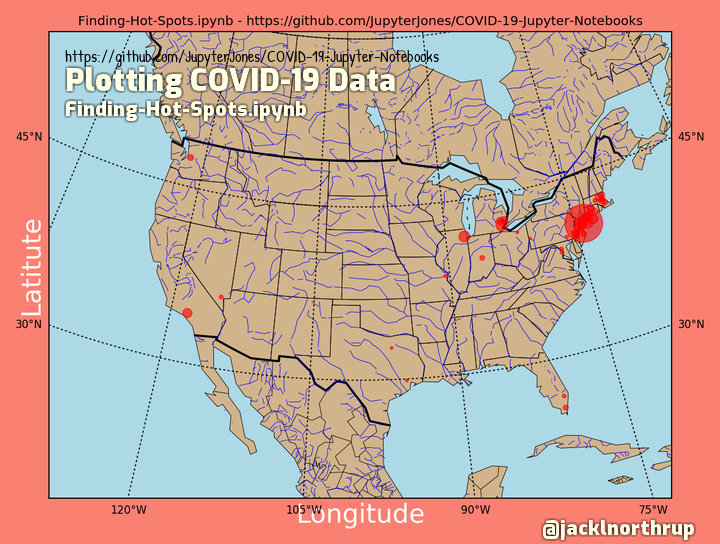

In [56]:
from PIL import Image
IM = Image.open(PATH)
print(IM.size)
IM

In [32]:
from GlobalData import *
print(GlobalData("help"))

None


In [31]:
!ls GlobalData*

GlobalData.py
